# Weather  Analysis Project

Here, the weather dataset is a time-series data set with per-hour information about the weather conditions at a particular location. It records temperature, dew point temperature, relative humidity, wind speed, visibility, pressure and weather description.

#### Importing Libraries

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [2]:
df = pd.read_csv("weather-data.csv")

In [3]:
df.head()

,Date/Time,Temperature (in Degree Celsius),Dew Point Temperature (in Degree Celsius),Relative Humidity (in %),Wind Speed (in km/h),Visibility (in km),Pressure (in kilopascal),Weather Description
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [65]:
#dimension
df.shape

(8784, 8)

In [66]:
#column names
df.columns

Index(['Date/Time', 'Temperature (in Degree Celsius)',
       'Dew Point Temperature (in Degree Celsius)', 'Relative Humidity (in %)',
       'Wind Speed (in km/h)', 'Visibility (in km)',
       'Pressure (in kilopascal)', 'Weather Description'],
      dtype='object')

In [68]:
#data types
df.dtypes

Date/Time                                     object
Temperature (in Degree Celsius)              float64
Dew Point Temperature (in Degree Celsius)    float64
Relative Humidity (in %)                       int64
Wind Speed (in km/h)                           int64
Visibility (in km)                           float64
Pressure (in kilopascal)                     float64
Weather Description                           object
dtype: object

In [70]:
#information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Date/Time                                  8784 non-null   object 
 1   Temperature (in Degree Celsius)            8784 non-null   float64
 2   Dew Point Temperature (in Degree Celsius)  8784 non-null   float64
 3   Relative Humidity (in %)                   8784 non-null   int64  
 4   Wind Speed (in km/h)                       8784 non-null   int64  
 5   Visibility (in km)                         8784 non-null   float64
 6   Pressure (in kilopascal)                   8784 non-null   float64
 7   Weather Description                        8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [53]:
# Checking if there are any null values
df.isnull().sum()

Date/Time                                    0
Temperature (in Degree Celsius)              0
Dew Point Temperature (in Degree Celsius)    0
Relative Humidity (in %)                     0
Wind Speed (in km/h)                         0
Visibility (in km)                           0
Pressure (in kilopascal)                     0
Weather Description                          0
dtype: int64

In [72]:
# total number of unique values in each column
df.nunique()

Date/Time                                    8784
Temperature (in Degree Celsius)               533
Dew Point Temperature (in Degree Celsius)     489
Relative Humidity (in %)                       83
Wind Speed (in km/h)                           34
Visibility (in km)                             24
Pressure (in kilopascal)                      518
Weather Description                            50
dtype: int64

In [73]:
# the total number of non-null values in each column
df.count()

Date/Time                                    8784
Temperature (in Degree Celsius)              8784
Dew Point Temperature (in Degree Celsius)    8784
Relative Humidity (in %)                     8784
Wind Speed (in km/h)                         8784
Visibility (in km)                           8784
Pressure (in kilopascal)                     8784
Weather Description                          8784
dtype: int64

#### To find unique instances of weather types

In [71]:
df['Weather Description'].unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [54]:
weather=df['Weather Description'].value_counts() 

### Weather & Frequency

In [55]:
df1=pd.DataFrame(weather)

In [56]:
df1 = df1.reset_index()
df1.columns = ['Weather Description', 'Frequency']
df1

,Weather Description,Frequency
0,Mainly Clear,2106
1,Mostly Cloudy,2069
2,Cloudy,1728
3,Clear,1326
4,Snow,390
5,Rain,306
6,Rain Showers,188
7,Fog,150
8,"Rain,Fog",116
9,"Drizzle,Fog",80


## Finding mean temperature

In [4]:
print(df["Temperature (in Degree Celsius)"])

0      -1.8
1      -1.8
2      -1.8
3      -1.5
4      -1.5
       ... 
8779    0.1
8780    0.2
8781   -0.5
8782   -0.2
8783    0.0
Name: Temperature (in Degree Celsius), Length: 8784, dtype: float64


In [5]:
temperature_arr = df["Temperature (in Degree Celsius)"].to_numpy()

In [6]:
temperature_mean = np.mean(temperature_arr)

In [7]:
print(temperature_mean)

8.798144353369764


## Finding mean dew point temperature

In [8]:
print(df["Dew Point Temperature (in Degree Celsius)"])

0      -3.9
1      -3.7
2      -3.4
3      -3.2
4      -3.3
       ... 
8779   -2.7
8780   -2.4
8781   -1.5
8782   -1.8
8783   -2.1
Name: Dew Point Temperature (in Degree Celsius), Length: 8784, dtype: float64


In [9]:
dew_point_temperature_arr = df["Dew Point Temperature (in Degree Celsius)"].to_numpy()

In [10]:
dew_point_temperature_mean = np.mean(dew_point_temperature_arr)

In [11]:
print(dew_point_temperature_mean)

2.5552937158469944


## Finding mean relative humidity

In [12]:
print(df["Relative Humidity (in %)"])

0       86
1       87
2       89
3       88
4       88
        ..
8779    81
8780    83
8781    93
8782    89
8783    86
Name: Relative Humidity (in %), Length: 8784, dtype: int64


In [13]:
relative_humidity_arr = df["Relative Humidity (in %)"].to_numpy()

In [14]:
relative_humidity_mean = np.mean(relative_humidity_arr)

In [15]:
print(relative_humidity_mean)

67.43169398907104


## Finding mean wind speed

In [16]:
print(df["Wind Speed (in km/h)"])

0        4
1        4
2        7
3        6
4        7
        ..
8779    30
8780    24
8781    28
8782    28
8783    30
Name: Wind Speed (in km/h), Length: 8784, dtype: int64


In [74]:
#unique values
df["Wind Speed (in km/h)"].unique()

array([ 4,  7,  6,  9, 15, 13, 20, 22, 19, 24, 30, 35, 39, 32, 33, 26, 44,
       43, 48, 37, 28, 17, 11,  0, 83, 70, 57, 46, 41, 52, 50, 63, 54,  2],
      dtype=int64)

In [17]:
wind_speed_arr = df["Wind Speed (in km/h)"].to_numpy()

In [18]:
wind_speed_mean = np.mean(wind_speed_arr)

In [19]:
print(wind_speed_mean)

14.94546903460838


## Finding mean visibility

In [20]:
print(df["Visibility (in km)"])

0        8.0
1        8.0
2        4.0
3        4.0
4        4.8
        ... 
8779     9.7
8780     9.7
8781     4.8
8782     9.7
8783    11.3
Name: Visibility (in km), Length: 8784, dtype: float64


In [21]:
visibility_arr = df["Visibility (in km)"].to_numpy();

In [22]:
print(visibility_arr)

[ 8.   8.   4.  ...  4.8  9.7 11.3]


In [23]:
visibility_mean = np.mean(visibility_arr)

In [24]:
print(visibility_mean)

27.664446721311478


## Finding mean pressure

In [25]:
print(df["Pressure (in kilopascal)"])

0       101.24
1       101.24
2       101.26
3       101.27
4       101.23
         ...  
8779    100.13
8780    100.03
8781     99.95
8782     99.91
8783     99.89
Name: Pressure (in kilopascal), Length: 8784, dtype: float64


In [26]:
pressure_arr = df["Pressure (in kilopascal)"].to_numpy()

In [27]:
pressure_mean = np.mean(pressure_arr)

In [28]:
print(pressure_mean)

101.05162340619307


## Handling null values in the dataframe

### Counting the number of individual cells that are null in the entire dataframe)

In [29]:
null_count = df.isnull().sum().sum()

In [30]:
print("There are", null_count, "null values in the dataframe.")

There are 0 null values in the dataframe.


### Counting the number of rows that have at least one null value

In [31]:
null_rows_count = df.isnull().any(axis=1).sum()

In [32]:
print("There are", null_rows_count, "rows that contain at least one null value.")

There are 0 rows that contain at least one null value.


### Counting the number of columns that have at least one null value

In [33]:
null_columns_count = df.isnull().any(axis=0).sum()

In [34]:
print("There are", null_columns_count, "columns that contain at least one null value.")

There are 0 columns that contain at least one null value.


## To find all records from data of when the weather was exactly clear


In [58]:
df[df['Weather Description'] == 'Clear']

,Date/Time,Temperature (in Degree Celsius),Dew Point Temperature (in Degree Celsius),Relative Humidity (in %),Wind Speed (in km/h),Visibility (in km),Pressure (in kilopascal),Weather Description
67,1/3/2012 19:00,-16.9,-24.8,50,24,25.0,101.74,Clear
114,1/5/2012 18:00,-7.1,-14.4,56,11,25.0,100.71,Clear
115,1/5/2012 19:00,-9.2,-15.4,61,7,25.0,100.80,Clear
116,1/5/2012 20:00,-9.8,-15.7,62,9,25.0,100.83,Clear
117,1/5/2012 21:00,-9.0,-14.8,63,13,25.0,100.83,Clear
...,...,...,...,...,...,...,...,...
8646,12/26/2012 6:00,-13.4,-14.8,89,4,25.0,102.47,Clear
8698,12/28/2012 10:00,-6.1,-8.6,82,19,24.1,101.27,Clear
8713,12/29/2012 1:00,-11.9,-13.6,87,11,25.0,101.31,Clear
8714,12/29/2012 2:00,-11.8,-13.1,90,13,25.0,101.33,Clear


## Displaying all the records where the weather condition is 'Snow'

In [35]:
snow_rows = df[df["Weather Description"] == 'Snow']

In [38]:
display(snow_rows)

,Date/Time,Temperature (in Degree Celsius),Dew Point Temperature (in Degree Celsius),Relative Humidity (in %),Wind Speed (in km/h),Visibility (in km),Pressure (in kilopascal),Weather Description
55,1/3/2012 7:00,-14.0,-19.5,63,19,25.0,100.95,Snow
84,1/4/2012 12:00,-13.7,-21.7,51,11,24.1,101.25,Snow
86,1/4/2012 14:00,-11.3,-19.0,53,7,19.3,100.97,Snow
87,1/4/2012 15:00,-10.2,-16.3,61,11,9.7,100.89,Snow
88,1/4/2012 16:00,-9.4,-15.5,61,13,19.3,100.79,Snow
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [39]:
print("The number of rows where the weather is 'Snow':", len(snow_rows))

The number of rows where the weather is 'Snow': 390


## Finding all the records where the weather is 'Snow' and the temperature is less than -10 degree celsius


In [40]:
snow_rows_less_than_negative_10_temperature = df[(df["Weather Description"] == "Snow") & (df["Temperature (in Degree Celsius)"] < -10)]

In [41]:
display(snow_rows_less_than_negative_10_temperature)

,Date/Time,Temperature (in Degree Celsius),Dew Point Temperature (in Degree Celsius),Relative Humidity (in %),Wind Speed (in km/h),Visibility (in km),Pressure (in kilopascal),Weather Description
55,1/3/2012 7:00,-14.0,-19.5,63,19,25.0,100.95,Snow
84,1/4/2012 12:00,-13.7,-21.7,51,11,24.1,101.25,Snow
86,1/4/2012 14:00,-11.3,-19.0,53,7,19.3,100.97,Snow
87,1/4/2012 15:00,-10.2,-16.3,61,11,9.7,100.89,Snow
123,1/6/2012 3:00,-10.6,-16.0,64,0,9.7,100.76,Snow
124,1/6/2012 4:00,-11.3,-16.1,68,15,3.2,100.70,Snow
125,1/6/2012 5:00,-11.8,-16.0,71,19,2.8,100.61,Snow
126,1/6/2012 6:00,-12.0,-16.2,71,22,4.8,100.58,Snow
127,1/6/2012 7:00,-14.4,-16.3,85,22,2.4,100.52,Snow
128,1/6/2012 8:00,-12.3,-16.2,73,24,11.3,100.51,Snow


In [42]:
print("Number of rows having less than 10 degree celsius temperature and weather description as 'Snow' is:", len(snow_rows_less_than_negative_10_temperature))

Number of rows having less than 10 degree celsius temperature and weather description as 'Snow' is: 36


## Finding minimum and maximum values of temperature

In [43]:
display(df["Temperature (in Degree Celsius)"])

0      -1.8
1      -1.8
2      -1.8
3      -1.5
4      -1.5
       ... 
8779    0.1
8780    0.2
8781   -0.5
8782   -0.2
8783    0.0
Name: Temperature (in Degree Celsius), Length: 8784, dtype: float64

In [44]:
print("Minimum temperature:", df["Temperature (in Degree Celsius)"].min())

Minimum temperature: -23.3


In [45]:
print("Maximum temperature:", df["Temperature (in Degree Celsius)"].max())

Maximum temperature: 33.0


## Finding the variance of relative humidity

In [46]:
variance_relative_humidity = df["Relative Humidity (in %)"].var()

In [47]:
print(variance_relative_humidity)

286.2485501984998


## Finding the standard deviation of pressure

In [48]:
standard_deviation_pressure = df["Pressure (in kilopascal)"].var()

In [49]:
print(standard_deviation_pressure)

0.7123440111838408


## Finding the records in which the wind speed is greater than 70 km/h
(By 75 km/h, the wind is strong enough to cause	slight structural damage and by 90 km/h it can uproot entire trees)

In [50]:
dangerous_wind_speed = df[df["Wind Speed (in km/h)"] > 70]

In [51]:
display(dangerous_wind_speed)

,Date/Time,Temperature (in Degree Celsius),Dew Point Temperature (in Degree Celsius),Relative Humidity (in %),Wind Speed (in km/h),Visibility (in km),Pressure (in kilopascal),Weather Description
409,1/18/2012 1:00,3.7,-2.1,66,83,25.0,98.36,Mostly Cloudy


In [52]:
print("Number of records in which wind speed is greater than 70 km/h:", len(dangerous_wind_speed))

Number of records in which wind speed is greater than 70 km/h: 1


## Find all instances when 'Wind Speed' is above 24 and 'Visibility' is 25

In [78]:
df[(df["Wind Speed (in km/h)"] > 24) & (df["Visibility (in km)"] == 25)]

,Date/Time,Temperature (in Degree Celsius),Dew Point Temperature (in Degree Celsius),Relative Humidity (in %),Wind Speed (in km/h),Visibility (in km),Pressure (in kilopascal),Weather Description
23,1/1/2012 23:00,5.3,2.0,79,30,25.0,99.31,Cloudy
24,1/2/2012 0:00,5.2,1.5,77,35,25.0,99.26,Rain Showers
25,1/2/2012 1:00,4.6,0.0,72,39,25.0,99.26,Cloudy
26,1/2/2012 2:00,3.9,-0.9,71,32,25.0,99.26,Mostly Cloudy
27,1/2/2012 3:00,3.7,-1.5,69,33,25.0,99.30,Mostly Cloudy
...,...,...,...,...,...,...,...,...
8705,12/28/2012 17:00,-8.6,-12.0,76,26,25.0,101.34,Mainly Clear
8753,12/30/2012 17:00,-12.1,-15.8,74,28,25.0,101.26,Mainly Clear
8755,12/30/2012 19:00,-13.4,-16.5,77,26,25.0,101.47,Mainly Clear
8759,12/30/2012 23:00,-12.1,-15.1,78,28,25.0,101.52,Mostly Cloudy


## What is the mean value of each column against each ' Weather Condition'?

In [79]:
df.groupby("Weather Description").mean()

C:\Users\shromana\AppData\Local\Temp\ipykernel_5608\624578575.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Weather Description").mean()


,Temperature (in Degree Celsius),Dew Point Temperature (in Degree Celsius),Relative Humidity (in %),Wind Speed (in km/h),Visibility (in km),Pressure (in kilopascal)
Weather Description,,,,,,
Clear,6.825716,0.089367,64.497738,10.557315,30.153243,101.587443
Cloudy,7.970544,2.375810,69.592593,16.127315,26.625752,100.911441
Drizzle,7.353659,5.504878,88.243902,16.097561,17.931707,100.435366
"Drizzle,Fog",8.067500,7.033750,93.275000,11.862500,5.257500,100.786625
"Drizzle,Ice Pellets,Fog",0.400000,-0.700000,92.000000,20.000000,4.000000,100.790000
"Drizzle,Snow",1.050000,0.150000,93.500000,14.000000,10.500000,100.890000
"Drizzle,Snow,Fog",0.693333,0.120000,95.866667,15.533333,5.513333,99.281333
Fog,4.303333,3.159333,92.286667,7.946667,6.248000,101.184067
Freezing Drizzle,-5.657143,-8.000000,83.571429,16.571429,9.200000,100.202857


## What is the min and max value of each column against each 'weather condition'

In [80]:
df.groupby("Weather Description").min()

,Date/Time,Temperature (in Degree Celsius),Dew Point Temperature (in Degree Celsius),Relative Humidity (in %),Wind Speed (in km/h),Visibility (in km),Pressure (in kilopascal)
Weather Description,,,,,,,
Clear,1/11/2012 1:00,-23.3,-28.5,20,0,11.3,99.52
Cloudy,1/1/2012 17:00,-21.4,-26.8,18,0,11.3,98.39
Drizzle,1/23/2012 21:00,1.1,-0.2,74,0,6.4,97.84
"Drizzle,Fog",1/23/2012 20:00,0.0,-1.6,85,0,1.0,98.65
"Drizzle,Ice Pellets,Fog",12/17/2012 9:00,0.4,-0.7,92,20,4.0,100.79
"Drizzle,Snow",12/17/2012 15:00,0.9,0.1,92,9,9.7,100.63
"Drizzle,Snow,Fog",12/18/2012 21:00,0.3,-0.1,92,7,2.4,97.79
Fog,1/1/2012 0:00,-16.0,-17.2,80,0,0.2,98.31
Freezing Drizzle,1/13/2012 10:00,-9.0,-12.2,78,6,4.8,98.44


In [81]:
df.groupby("Weather Description").max()

,Date/Time,Temperature (in Degree Celsius),Dew Point Temperature (in Degree Celsius),Relative Humidity (in %),Wind Speed (in km/h),Visibility (in km),Pressure (in kilopascal)
Weather Description,,,,,,,
Clear,9/9/2012 5:00,32.8,20.4,99,33,48.3,103.63
Cloudy,9/9/2012 23:00,30.5,22.6,99,54,48.3,103.65
Drizzle,9/30/2012 3:00,18.8,17.7,96,30,25.0,101.56
"Drizzle,Fog",9/30/2012 2:00,19.9,19.1,100,28,9.7,102.07
"Drizzle,Ice Pellets,Fog",12/17/2012 9:00,0.4,-0.7,92,20,4.0,100.79
"Drizzle,Snow",12/19/2012 18:00,1.2,0.2,95,19,11.3,101.15
"Drizzle,Snow,Fog",12/22/2012 3:00,1.1,0.6,98,32,9.7,100.15
Fog,9/22/2012 0:00,20.8,19.6,100,22,9.7,103.04
Freezing Drizzle,2/1/2012 5:00,-2.3,-3.3,93,26,12.9,101.02


In [85]:
# Set 'date/time' as the index
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df.set_index('Date/Time', inplace=True)
df.head()

,Temperature (in Degree Celsius),Dew Point Temperature (in Degree Celsius),Relative Humidity (in %),Wind Speed (in km/h),Visibility (in km),Pressure (in kilopascal),Weather Description
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


## Mean Temperature recorded by each month?

In [87]:
mean_T_df=df.groupby(df.index.month).agg(np.mean).reset_index()
mean_T_df["Temperature (in Degree Celsius)"]

C:\Users\shromana\AppData\Local\Temp\ipykernel_5608\3386123254.py:1: FutureWarning: The operation <function mean at 0x000002A9FBAFA200> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  mean_T_df=df.groupby(df.index.month).agg(np.mean).reset_index()


0     -7.371505
1     -4.225000
2      3.121237
3      7.009306
4     16.237769
5     20.134028
6     22.790054
7     22.279301
8     16.484444
9     10.954973
10     0.931389
11    -3.306317
Name: Temperature (in Degree Celsius), dtype: float64

## Visualisation

### To display a graph of variation of temperature with respect to time

<Axes: xlabel='Date/Time'>

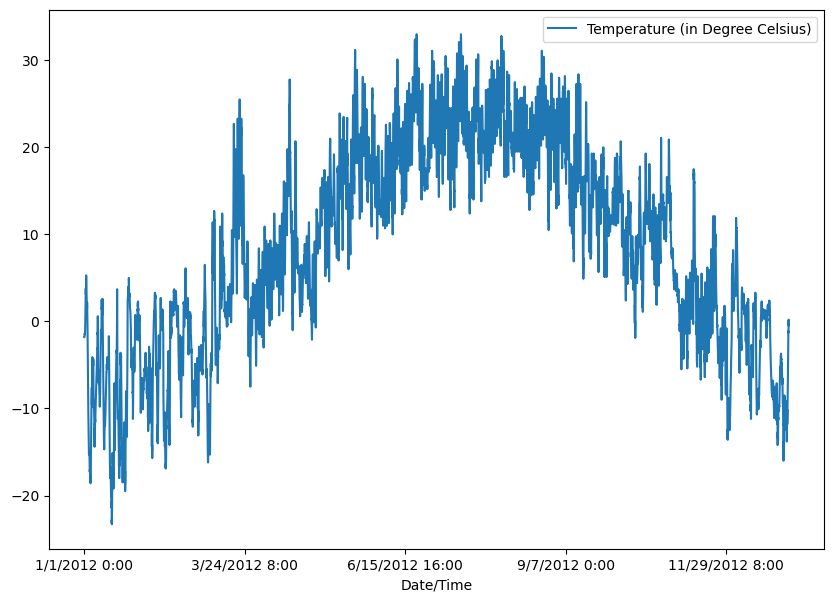

In [60]:
graph=df[["Temperature (in Degree Celsius)", 'Date/Time']]
graph.plot(x='Date/Time', y="Temperature (in Degree Celsius)",figsize=(10,7) )

### To display a pie chart of percentages of weather conditions

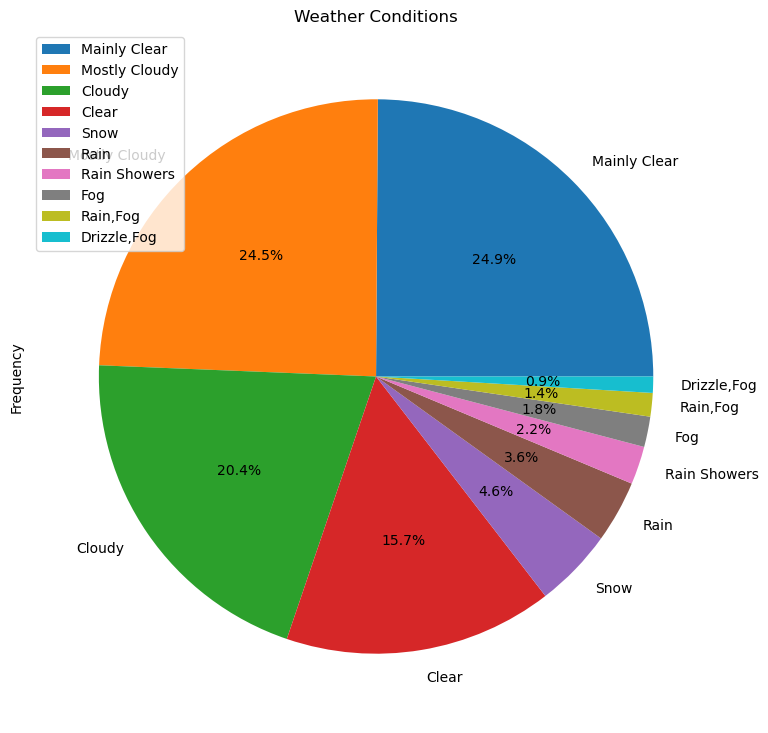

In [64]:
graph2=df1[df1['Frequency']>60]
#print(graph2)
labels = df1['Weather Description'].tolist()
graph2.plot.pie(y='Frequency', labels=labels, autopct='%1.1f%%', shadow=False, figsize=(12,9))
plt.title("Weather Conditions")
plt.show()